In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
column_names = [
    "ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1",
    "smoothness1", "compactness1", "concavity1", "concave_points1",
    "symmetry1", "fractal_dimension1", "radius2", "texture2", 
    "perimeter2", "area2", "smoothness2", "compactness2", 
    "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", 
    "compactness3", "concavity3", "concave_points3", "symmetry3", 
    "fractal_dimension3"
]


data_url = "wdbc.data"
data = pd.read_csv(data_url, header=None, names=column_names)

print(data.head())
print(data.info())
print(data.describe())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

In [3]:
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)


data = data.drop(columns=['ID'])


X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


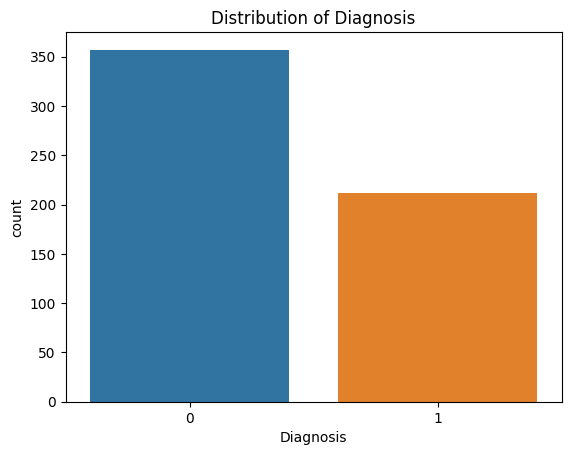

In [4]:
# Existing EDA visuals
# Visualize the distribution of the target variable
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

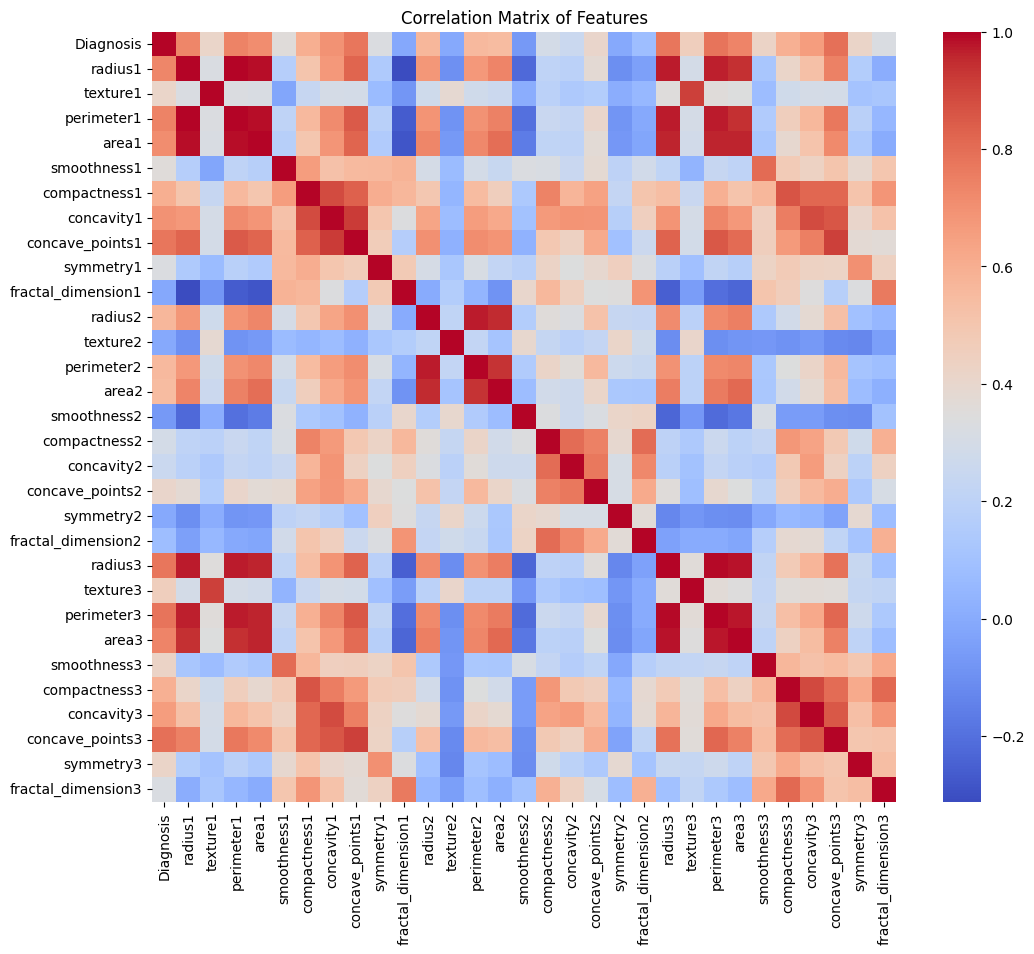

In [5]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


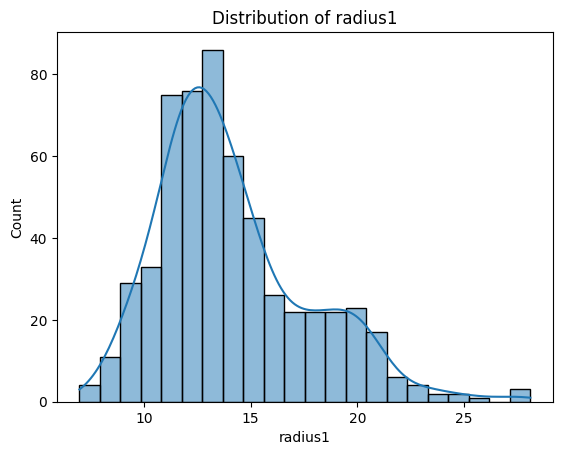

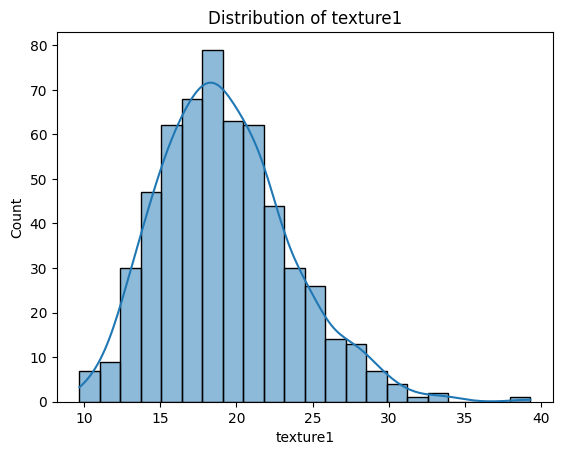

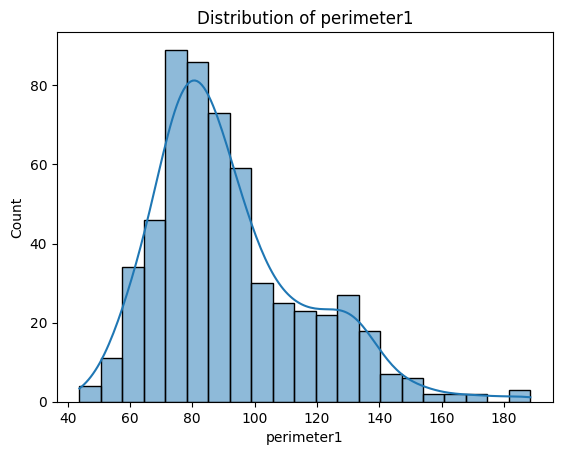

In [6]:

# Updated list of features to plot based on actual column names
features_to_plot = ['radius1', 'texture1', 'perimeter1']  # Example features from the available columns

# Visualize the distribution of some features
for feature in features_to_plot:
    if feature in data.columns:
        plt.figure()
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in data.")

In [7]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
param_dist_lr = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Support Vector Machine (SVM)
param_dist_svc = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-4, 4, 20)
}

# XGBoost
param_dist_xgb = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': np.linspace(0.5, 1.0, 10)
}


In [8]:
# Logistic Regression
random_search_lr = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_dist_lr, n_iter=100, cv=kf, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train)
best_lr = random_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

# Support Vector Machine (SVM)
random_search_svc = RandomizedSearchCV(SVC(probability=True), param_dist_svc, n_iter=100, cv=kf, scoring='accuracy', random_state=42)
random_search_svc.fit(X_train, y_train)
best_svc = random_search_svc.best_estimator_
print("Best parameters for SVM:", random_search_svc.best_params_)

# XGBoost
random_search_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_dist_xgb, n_iter=100, cv=kf, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.615848211066026}
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 0.012742749857031334, 'C': 4.281332398719396}


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

Best parameters for XGBoost: {'subsample': 0.5555555555555556, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.15}


In [9]:
# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


In [10]:
def evaluate_model(model, X, y, kf):
    scores = {}
    for metric_name, metric in scoring.items():
        score = cross_val_score(model, X, y, cv=kf, scoring=metric)
        scores[metric_name] = score.mean()
    return scores

# Evaluate the models
scores_lr = evaluate_model(best_lr, X_test, y_test, kf)
scores_svc = evaluate_model(best_svc, X_test, y_test, kf)
scores_xgb = evaluate_model(best_xgb, X_test, y_test, kf)

# Print the scores
print("Logistic Regression scores:", scores_lr)
print("SVM scores:", scores_svc)
print("XGBoost scores:", scores_xgb)

C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

Logistic Regression scores: {'accuracy': 0.964822134387352, 'precision': 0.975, 'recall': 0.9360439560439561, 'f1': 0.9527557354925775, 'roc_auc': 0.9982905982905983}
SVM scores: {'accuracy': 0.9561264822134387, 'precision': 0.975, 'recall': 0.9160439560439562, 'f1': 0.9410598290598291, 'roc_auc': 0.9982905982905983}
XGBoost scores: {'accuracy': 0.9644268774703557, 'precision': 0.956043956043956, 'recall': 0.9646153846153845, 'f1': 0.9587044534412955, 'roc_auc': 0.9965811965811966}


C:\Users\Supraja Vempalli\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


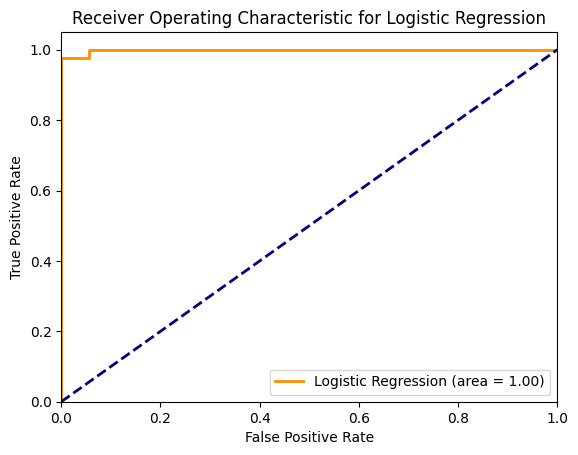

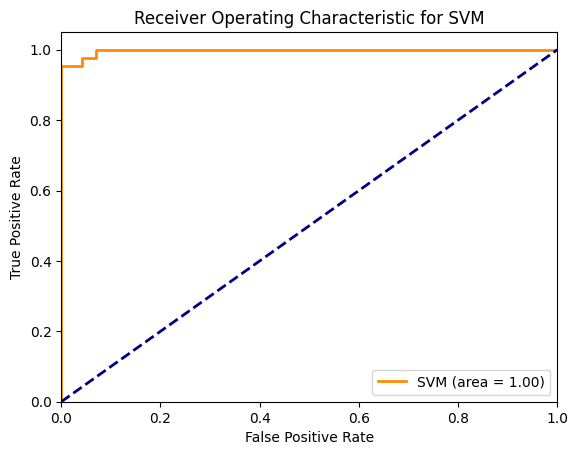

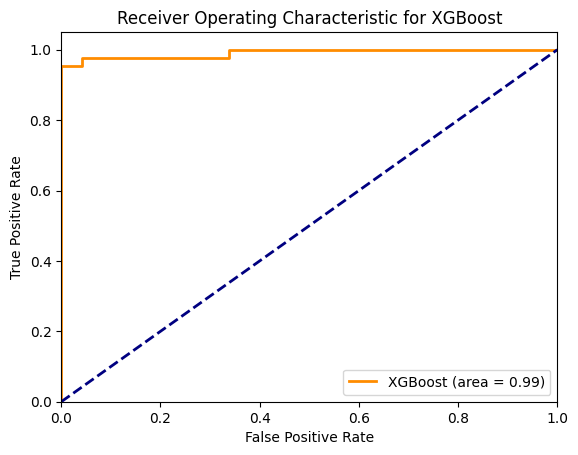

In [11]:
def plot_roc_curve(model, X, y, label):
    y_probs = model.predict_proba(X)[:, 1]  # Get the probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{label} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {label}')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for each model
plot_roc_curve(best_lr, X_test, y_test, 'Logistic Regression')
plot_roc_curve(best_svc, X_test, y_test, 'SVM')
plot_roc_curve(best_xgb, X_test, y_test, 'XGBoost')

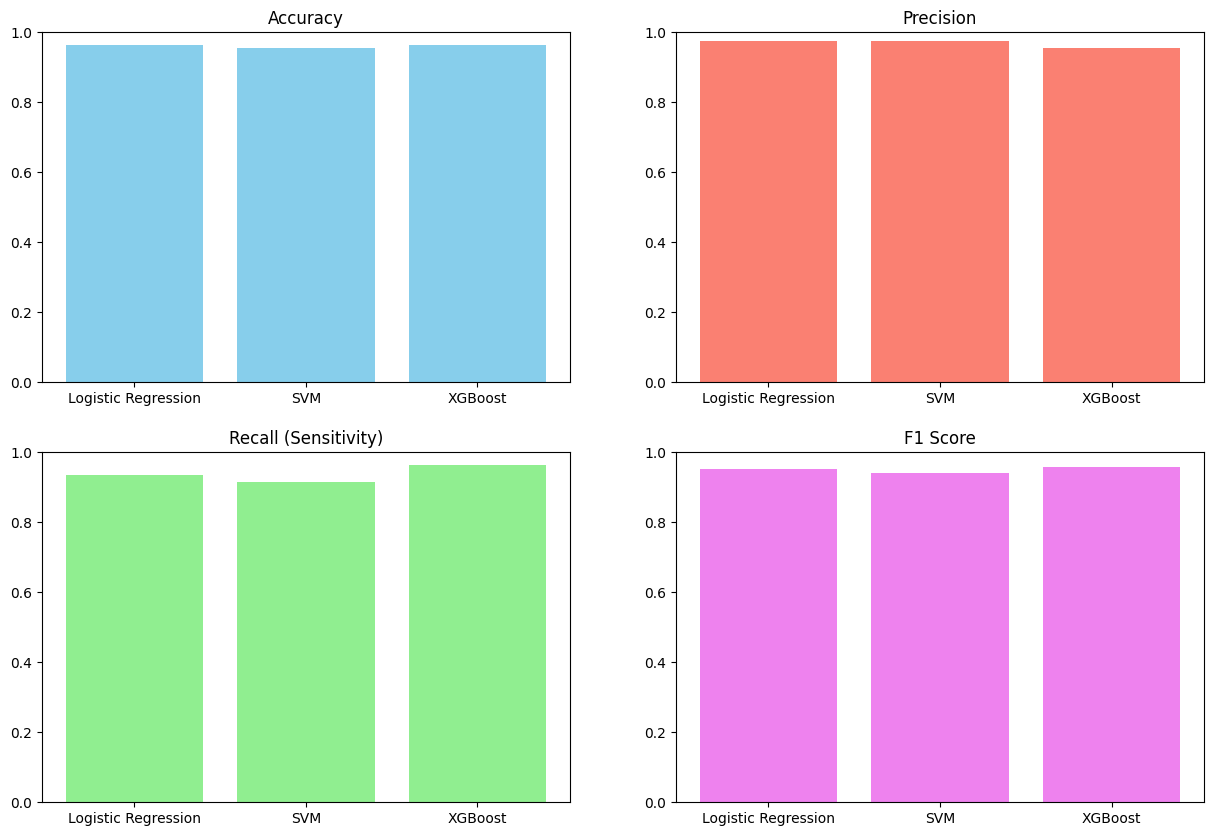

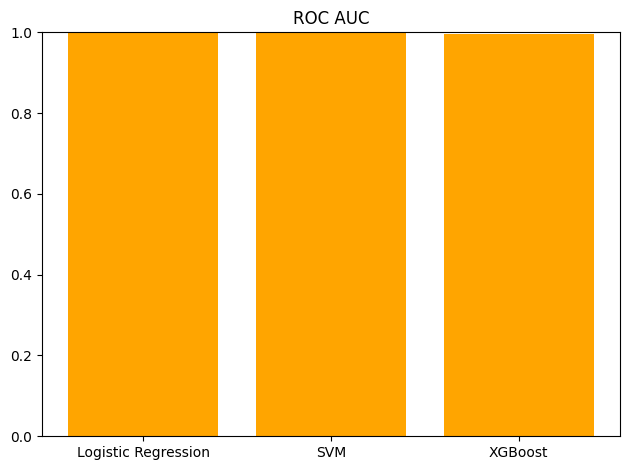

In [12]:
# Plotting the Results
models = ['Logistic Regression', 'SVM', 'XGBoost']
accuracies = [scores_lr['accuracy'], scores_svc['accuracy'], scores_xgb['accuracy']]
precisions = [scores_lr['precision'], scores_svc['precision'], scores_xgb['precision']]
recalls = [scores_lr['recall'], scores_svc['recall'], scores_xgb['recall']]
f1_scores = [scores_lr['f1'], scores_svc['f1'], scores_xgb['f1']]
roc_aucs = [scores_lr['roc_auc'], scores_svc['roc_auc'], scores_xgb['roc_auc']]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(models, accuracies, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(models, precisions, color='salmon')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

axes[1, 0].bar(models, recalls, color='lightgreen')
axes[1, 0].set_title('Recall (Sensitivity)')
axes[1, 0].set_ylim(0, 1)

axes[1, 1].bar(models, f1_scores, color='violet')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0, 1)

fig, ax = plt.subplots()
ax.bar(models, roc_aucs, color='orange')
ax.set_title('ROC AUC')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Confusion Matrix
def plot_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()




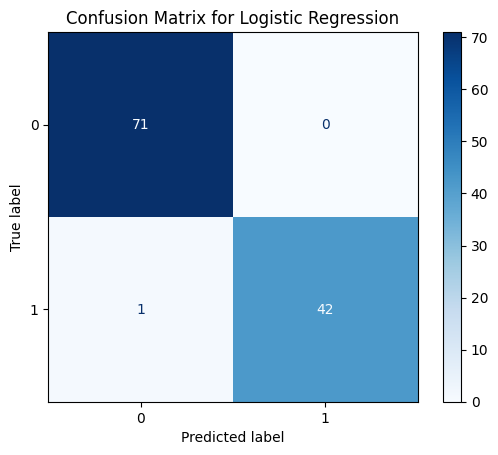

In [13]:
# Plot confusion matrices for the best models
plot_confusion_matrix(best_lr, X_test, y_test, 'Confusion Matrix for Logistic Regression')

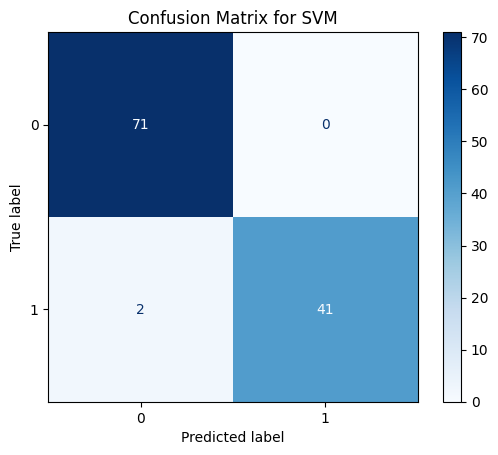

In [14]:
plot_confusion_matrix(best_svc, X_test, y_test, 'Confusion Matrix for SVM')

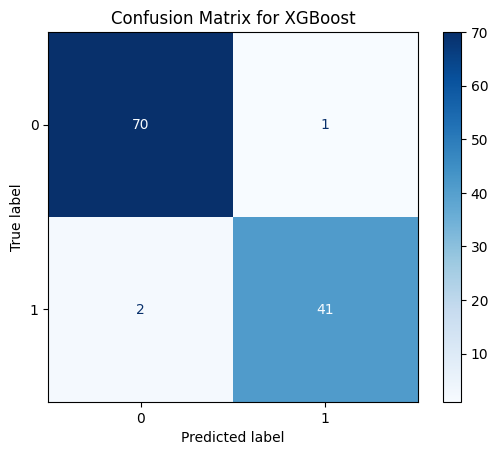

In [15]:
plot_confusion_matrix(best_xgb, X_test, y_test, 'Confusion Matrix for XGBoost')